In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.stats.proportion import proportions_ztest
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../data/2001-2019-National-Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 40 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Year                                                 19 non-null     int64  
 1   Veteran Suicide Deaths                               19 non-null     int64  
 2   Veteran Population Estimate                          19 non-null     int64  
 3   Veteran Crude Rate per 100,000                       19 non-null     float64
 4   Veteran Age Adjusted Rate per 100,000                19 non-null     float64
 5   Veteran Age and Sex Adjusted Rate per 100,000        19 non-null     float64
 6   Male Veteran Suicide Deaths                          19 non-null     int64  
 7   Male Veteran Population Estimate                     19 non-null     int64  
 8   Male Veteran Crude Rate per 100,000                  19 non-null     flo

In [27]:
df.describe()

,Year,Veteran Suicide Deaths,Veteran Population Estimate,"Veteran Crude Rate per 100,000","Veteran Age Adjusted Rate per 100,000","Veteran Age and Sex Adjusted Rate per 100,000",Male Veteran Suicide Deaths,Male Veteran Population Estimate,"Male Veteran Crude Rate per 100,000","Male Veteran Age Adjusted Rate per 100,000",Female Veteran Suicide Deaths,Female Veteran Population Estimate,"Female Veteran Crude Rate per 100,000","Female Veteran Age Adjusted Rate per 100,000",Non-Veteran Suicide Deaths,Non-Veteran Population Estimate,"Non-Veteran Crude Rate per 100,000","Non-Veteran Age Adjusted Rate per 100,000","Non-Veteran Age and Sex Adjusted Rate per 100,000",Male Non-Veteran Suicide Deaths,Male Non-Veteran Population Estimate,"Male Non-Veteran Crude Rate per 100,000","Male Non-Veteran Age Adjusted Rate per 100,000",Female Non-Veteran Suicide Deaths,Female Non-Veteran Population Estimate,"Female Non-Veteran Crude Rate per 100,000","Female Non-Veteran Age Adjusted Rate per 100,000",US Population Suicide Deaths,US Population Population Estimate,"US Population Crude Rate per 100,000","US Population Age Adjusted Rate per 100,000","US Population Age and Sex Adjusted Rate per 100,000",Male US Population Suicide Deaths,Male US Population Population Estimate,"Male US Population Crude Rate per 100,000","Male US Population Age Adjusted Rate per 100,000",Female US Population Suicide Deaths,Female US Population Population Estimate,"Female US Population Crude Rate per 100,000","Female US Population Age Adjusted Rate per 100,000"
count,19.000000,19.000000,1.900000e+01,19.000000,19.000000,19.000000,19.000000,1.900000e+01,19.000000,19.000000,19.000000,1.900000e+01,19.000000,19.000000,19.000000,1.900000e+01,19.000000,19.000000,19.000000,19.000000,1.900000e+01,19.000000,19.000000,19.000000,1.900000e+01,19.000000,19.000000,19.000000,1.900000e+01,19.000000,19.000000,19.000000,19.000000,1.900000e+01,19.000000,19.000000,19.000000,1.900000e+01,19.000000,19.000000
mean,2010.000000,6359.157895,2.280216e+07,28.115789,29.994737,22.310526,6122.894737,2.097958e+07,29.468421,32.489474,236.263158,1.822579e+06,12.831579,12.842105,31078.315789,2.117441e+08,14.563158,14.631579,15.905263,23347.736842,9.291966e+07,24.952632,26.568421,7730.578947,1.188245e+08,6.468421,6.547368,37437.473684,2.345463e+08,15.878947,15.931579,15.815789,29470.631579,1.138992e+08,25.752632,25.984211,7966.842105,1.206471e+08,6.557895,6.652632
std,5.627314,258.251011,1.824150e+06,3.185255,4.209971,4.096326,203.395590,1.914670e+06,3.391010,4.749608,68.970881,9.828774e+04,3.172810,3.365398,5478.833504,1.556860e+07,1.515919,1.549212,1.186720,4085.559201,8.874648e+06,2.022476,1.462134,1413.451147,6.694742e+06,0.823308,0.880258,5682.391900,1.374867e+07,1.501695,1.510354,1.453067,4220.283090,6.963897e+06,2.132387,2.030124,1479.938635,6.784904e+06,0.873890,0.887799
min,2001.000000,5981.000000,1.979700e+07,23.300000,24.400000,16.800000,5822.000000,1.780500e+07,24.200000,25.900000,134.000000,1.621000e+06,8.000000,7.600000,23591.000000,1.865648e+08,12.600000,12.700000,14.500000,18015.000000,7.854315e+07,22.600000,24.700000,5576.000000,1.080216e+08,5.200000,5.200000,29580.000000,2.122978e+08,13.900000,14.000000,13.900000,23850.000000,1.026552e+08,23.200000,23.600000,5730.000000,1.096426e+08,5.200000,5.300000
25%,2005.500000,6120.500000,2.145350e+07,24.900000,25.900000,18.350000,5943.500000,1.956100e+07,26.100000,27.800000,180.000000,1.766000e+06,9.950000,9.900000,25915.500000,1.989491e+08,13.050000,13.150000,14.850000,19479.000000,8.569793e+07,23.100000,25.300000,6499.500000,1.132511e+08,5.800000,5.800000,31981.000000,2.233076e+08,14.350000,14.350000,14.350000,25363.000000,1.082239e+08,23.600000,23.950000,6671.000000,1.150836e+08,5.800000,5.900000
50%,2010.000000,6437.000000,2.275200e+07,28.600000,29.500000,21.900000,6184.000000,2.096700e+07,29.900000,31.900000,233.000000,1.827000e+06,13.000000,12.800000,30813.000000,2.124490e+08,14.500000,14.600000,15.700000,23224.000000,9.319870e+07,24.900000,26.30

In [5]:
#df_year = df_sex.set_index('Year of Death')

In [6]:
#df_sex = df_year[['Male Veteran Crude Rate per 100,000', 'Female Veteran Crude Rate per 100,000']]

In [7]:
#df_sex.hist(figsize = (12,5), grid = False)

## Hypothesis test 2
### H0: Male Veteran > Female Veteran
### Ha: Male Veteran < Female Veteran

In [8]:
df_sex = df[['Year', 'Male Veteran Suicide Deaths', 'Male Veteran Population Estimate', 'Male Veteran Crude Rate per 100,000', 'Female Veteran Suicide Deaths', 'Female Veteran Population Estimate', 'Female Veteran Crude Rate per 100,000', 'Male Non-Veteran Suicide Deaths','Male Non-Veteran Population Estimate', 'Female Non-Veteran Suicide Deaths', 'Female Non-Veteran Population Estimate', 'Male US Population Suicide Deaths', 'Male US Population Population Estimate', 'Female US Population Suicide Deaths', 'Female US Population Population Estimate']]

In [9]:
df_sex['Male Veteran Suicide Deaths per million'] = df_sex['Male Veteran Suicide Deaths']/df_sex['Male Veteran Population Estimate'] *1000000
df_sex['Female Veteran Suicide Deaths per million'] = df_sex['Female Veteran Suicide Deaths']/df_sex['Female Veteran Population Estimate'] *1000000

/tmp/ipykernel_140/2832020967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sex['Male Veteran Suicide Deaths per million'] = df_sex['Male Veteran Suicide Deaths']/df_sex['Male Veteran Population Estimate'] *1000000
/tmp/ipykernel_140/2832020967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sex['Female Veteran Suicide Deaths per million'] = df_sex['Female Veteran Suicide Deaths']/df_sex['Female Veteran Population Estimate'] *1000000


In [10]:
df_sex['Male Non-Veteran Suicide Deaths per million'] = df_sex['Male Non-Veteran Suicide Deaths']/df_sex['Male Non-Veteran Population Estimate'] *1000000
df_sex['Female Non-Veteran Suicide Deaths per million'] = df_sex['Female Non-Veteran Suicide Deaths']/df_sex['Female Non-Veteran Population Estimate'] *1000000

/tmp/ipykernel_140/2251552185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sex['Male Non-Veteran Suicide Deaths per million'] = df_sex['Male Non-Veteran Suicide Deaths']/df_sex['Male Non-Veteran Population Estimate'] *1000000
/tmp/ipykernel_140/2251552185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sex['Female Non-Veteran Suicide Deaths per million'] = df_sex['Female Non-Veteran Suicide Deaths']/df_sex['Female Non-Veteran Population Estimate'] *1000000


In [11]:
df_sex['Male US Population Suicide Deaths per million'] = df_sex['Male US Population Suicide Deaths']/df_sex['Male US Population Population Estimate'] *1000000
df_sex['Female US Population Suicide Deaths per million'] = df_sex['Female US Population Suicide Deaths']/df_sex['Female US Population Population Estimate'] *1000000

/tmp/ipykernel_140/3435652026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sex['Male US Population Suicide Deaths per million'] = df_sex['Male US Population Suicide Deaths']/df_sex['Male US Population Population Estimate'] *1000000
/tmp/ipykernel_140/3435652026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sex['Female US Population Suicide Deaths per million'] = df_sex['Female US Population Suicide Deaths']/df_sex['Female US Population Population Estimate'] *1000000


In [12]:
df_sex['Male Veteran Population Estimate (million)'] = df_sex['Male Veteran Population Estimate']/1000000
df_sex['Female Veteran Population Estimate (million)'] = df_sex['Female Veteran Population Estimate']/1000000
df_sex['Male Non-Veteran Population Estimate (million)'] = df_sex['Male Non-Veteran Population Estimate']/1000000
df_sex['Female Non-Veteran Population Estimate (million)'] = df_sex['Female Non-Veteran Population Estimate']/1000000

/tmp/ipykernel_140/2309558632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sex['Male Veteran Population Estimate (million)'] = df_sex['Male Veteran Population Estimate']/1000000
/tmp/ipykernel_140/2309558632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sex['Female Veteran Population Estimate (million)'] = df_sex['Female Veteran Population Estimate']/1000000
/tmp/ipykernel_140/2309558632.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

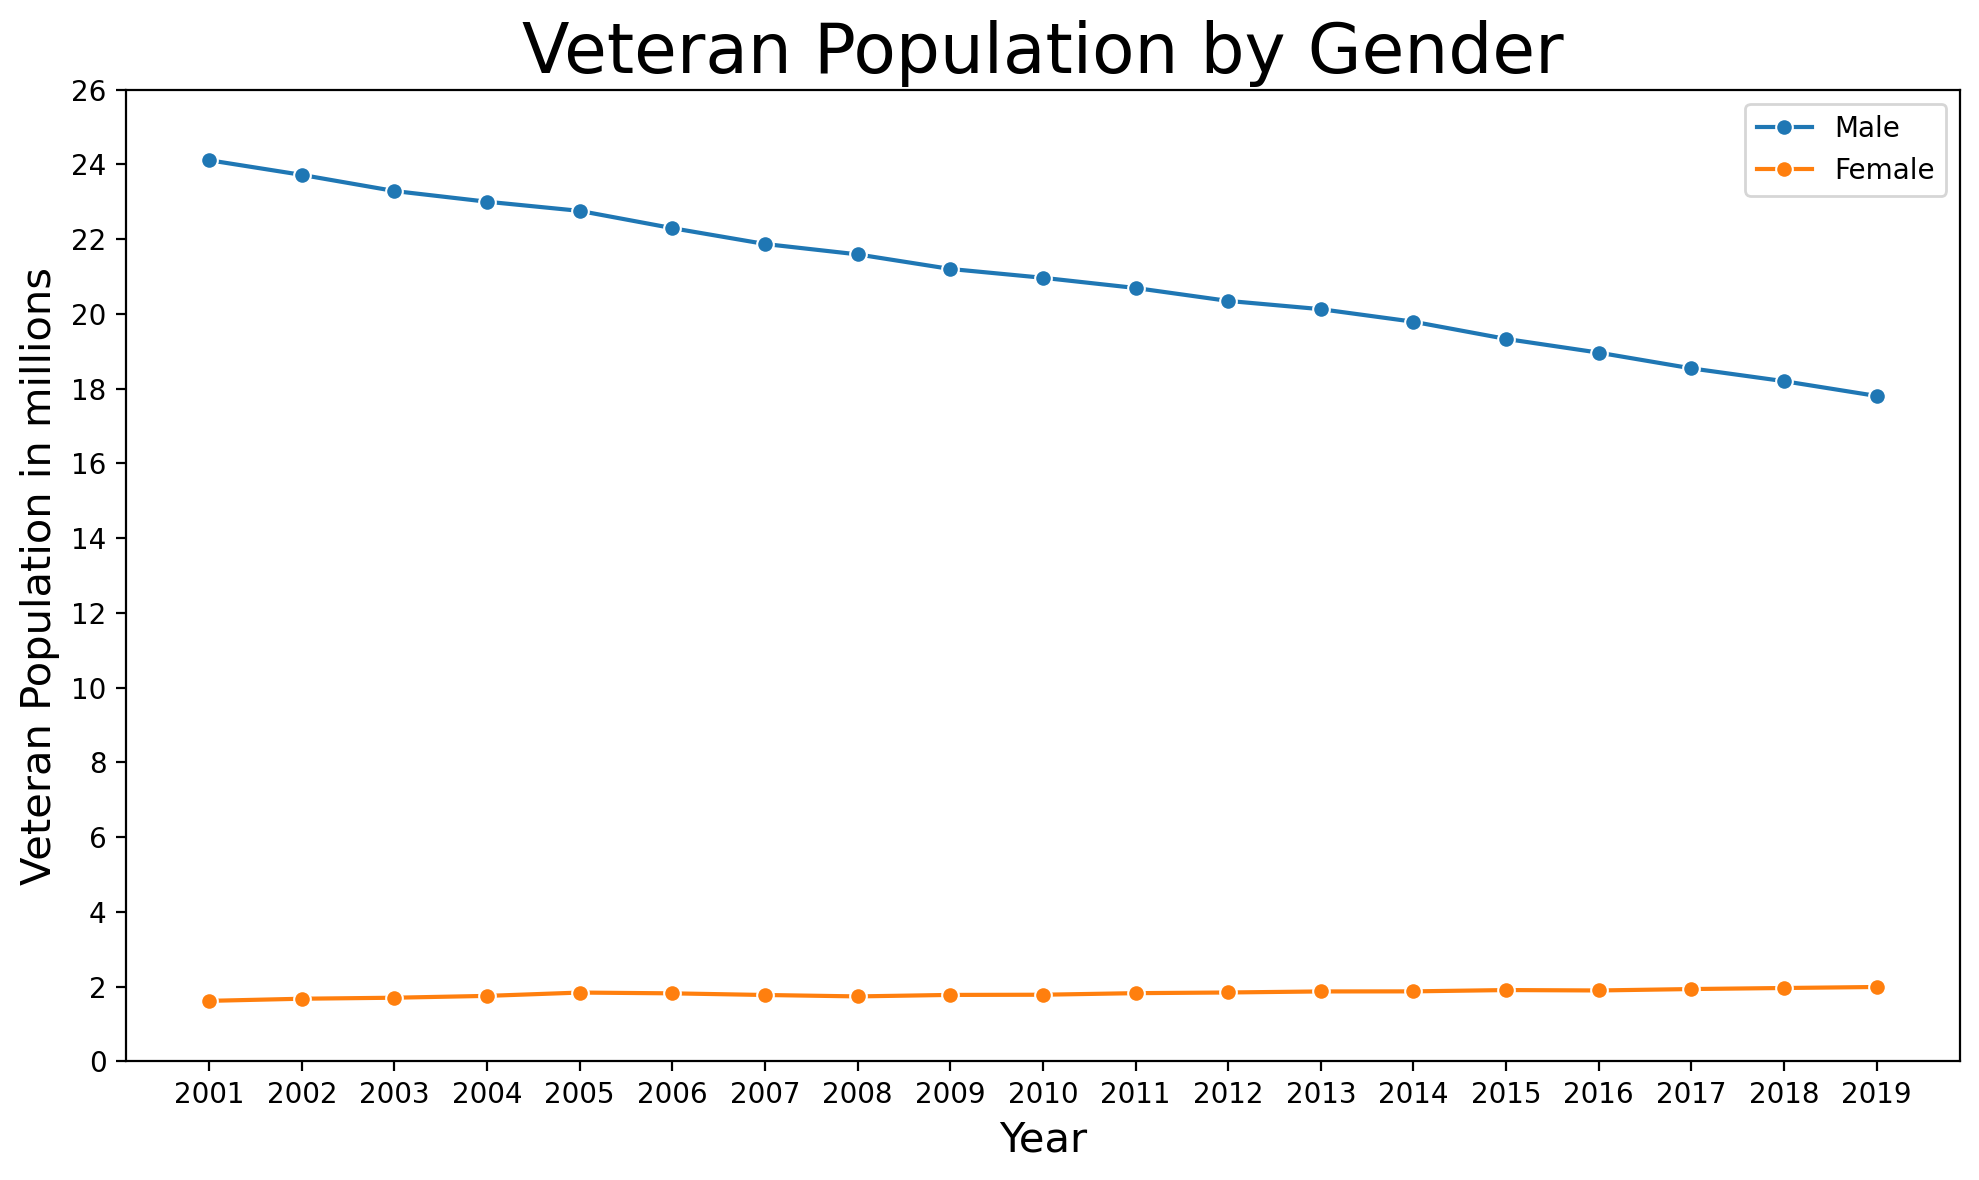

In [13]:
fig, ax = plt.subplots(figsize = (10,6), dpi=200)
sns.lineplot(x = df_sex['Year'], y =df_sex['Male Veteran Population Estimate (million)'], marker='o', label='Male')
sns.lineplot(x = df_sex['Year'], y =df_sex['Female Veteran Population Estimate (million)'], marker='o', label='Female')
ax.set_ylabel('Veteran Population in millions', fontsize = 15)
ax.set_xlabel('Year', fontsize = 15)
ax.set_title('Veteran Population by Gender', fontsize = 25)
ax.set_xticks(df_sex['Year'])
ax.set_yticks(np.arange(0, 28, 2))
plt.yticks(fontsize = 10)
fig.tight_layout()

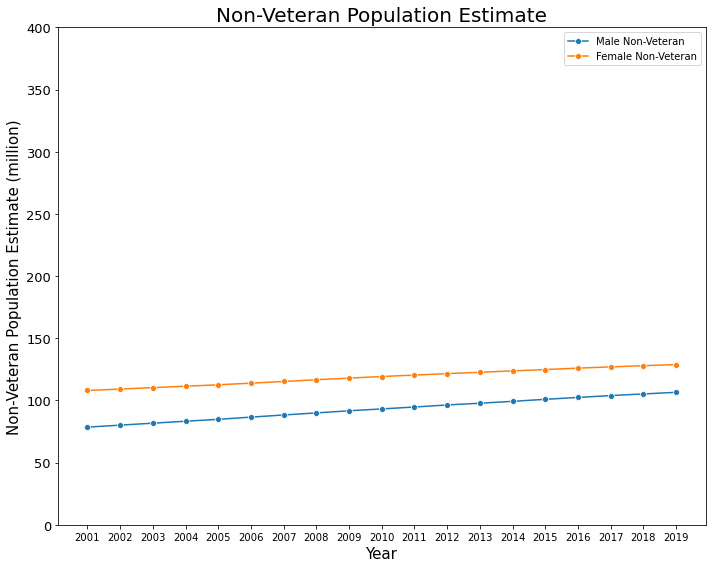

In [14]:
fig, ax = plt.subplots(figsize = (10,8))
sns.lineplot(x = df_sex['Year'], y =df_sex['Male Non-Veteran Population Estimate (million)'], marker='o',label='Male Non-Veteran')
sns.lineplot(x = df_sex['Year'], y =df_sex['Female Non-Veteran Population Estimate (million)'], marker='o',label= 'Female Non-Veteran')
ax.set_ylabel('Non-Veteran Population Estimate (million)', fontsize = 15)
ax.set_xlabel('Year', fontsize = 15)
ax.set_title('Non-Veteran Population Estimate', fontsize = 20)
ax.set_xticks(df_sex['Year'])
plt.ylim((0,400))
plt.yticks(fontsize = 13)
fig.tight_layout()

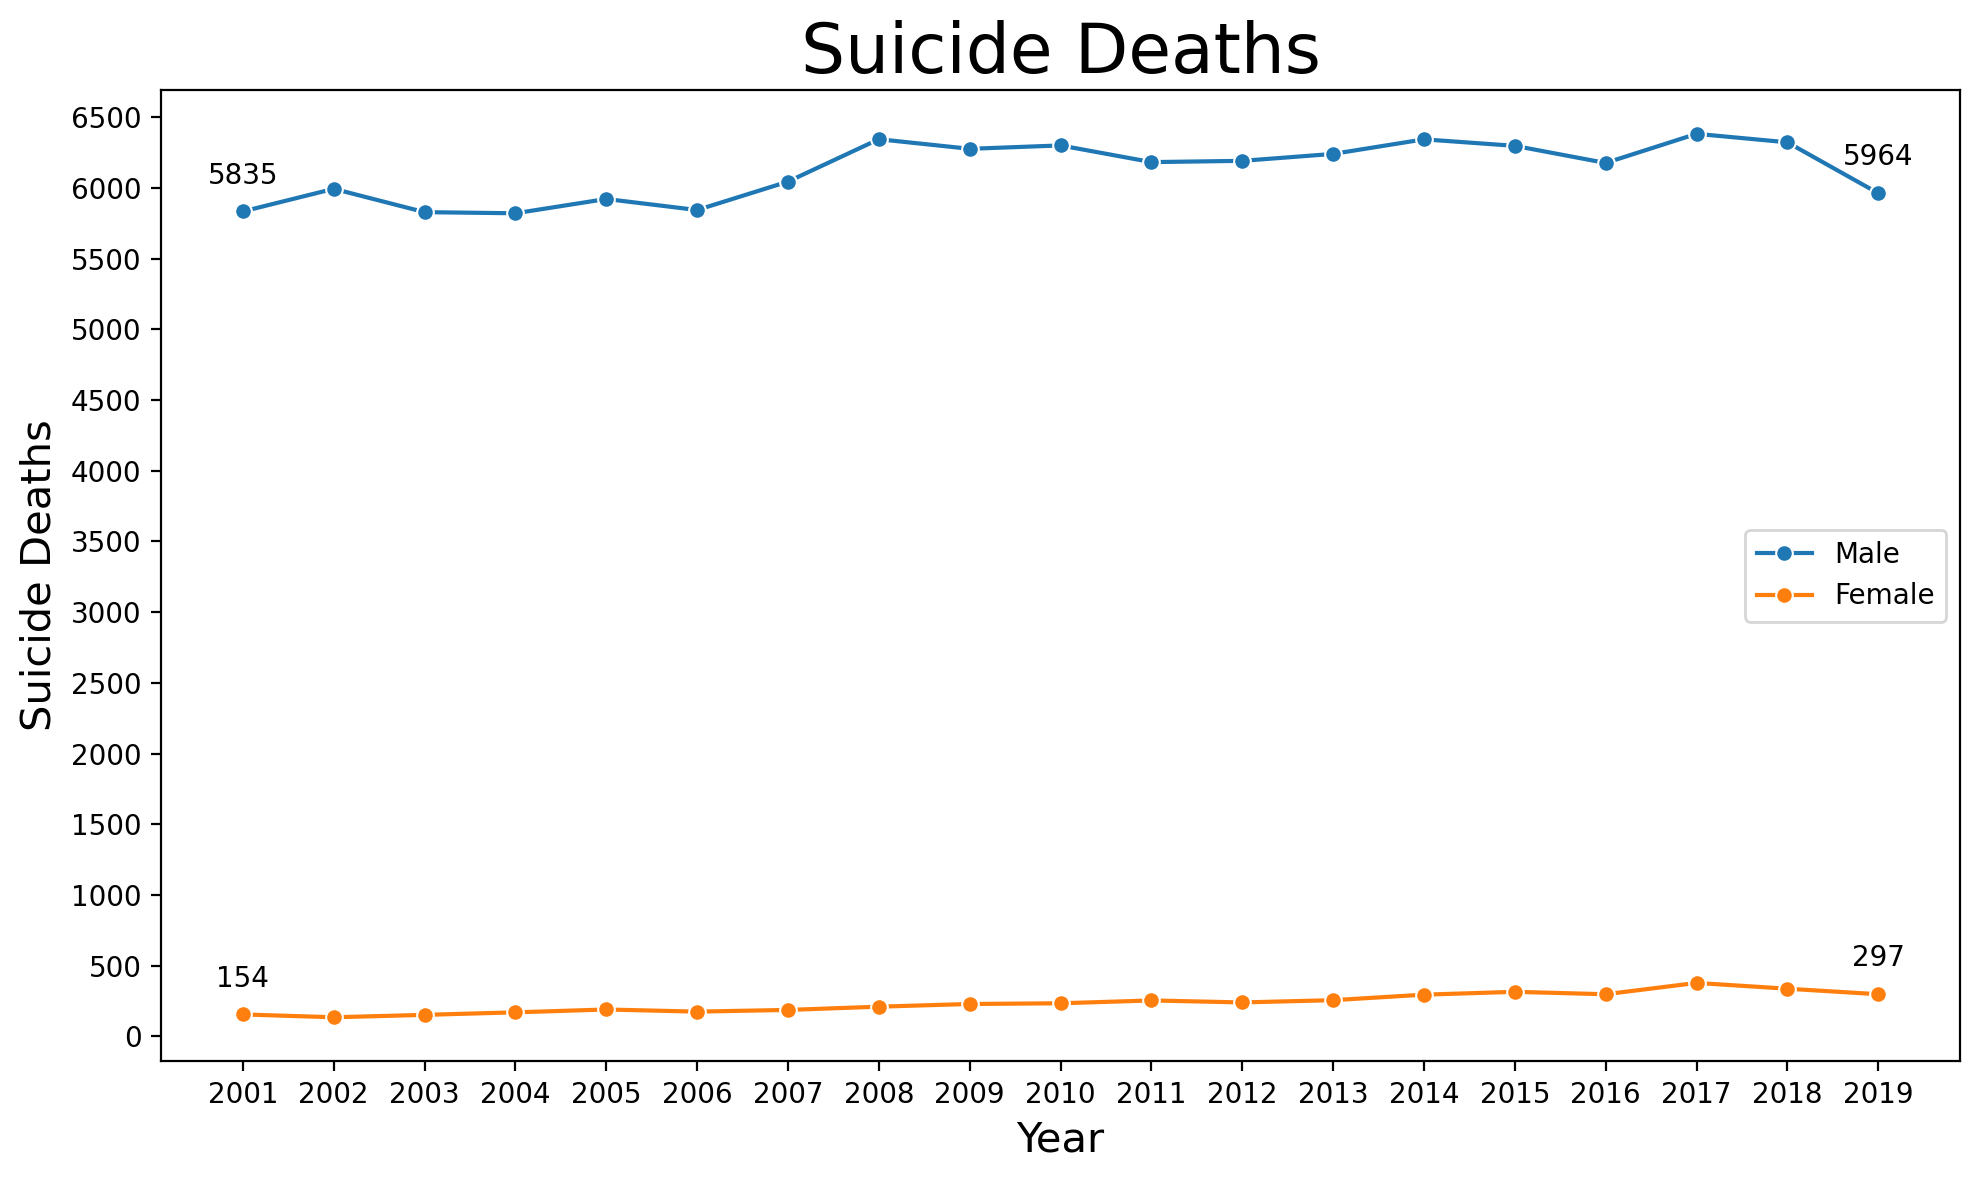

In [15]:
fig, ax = plt.subplots(figsize = (10,6), dpi=200)
sns.lineplot(x = df_sex['Year'], y =df_sex['Male Veteran Suicide Deaths'], marker='o', label= 'Male')
sns.lineplot(x = df_sex['Year'], y =df_sex['Female Veteran Suicide Deaths'], marker='o', label= 'Female')
ax.set_ylabel('Suicide Deaths', fontsize = 15)
ax.set_xlabel('Year', fontsize = 15)
ax.set_title('Suicide Deaths', fontsize = 25)
ax.set_xticks(df_sex['Year'])
ax.set_yticks(np.arange(0, 7000, 500))
ax.annotate(df_sex['Male Veteran Suicide Deaths'].values[0], xy=(df_sex['Year'][0], df_sex['Male Veteran Suicide Deaths'][0]),                  
                 textcoords="offset points", # how to position the text,
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center)
ax.annotate(df_sex['Male Veteran Suicide Deaths'].values[18], xy=(df_sex['Year'][18], df_sex['Male Veteran Suicide Deaths'][18]),                  
                 textcoords="offset points", # how to position the text,
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center)
ax.annotate(df_sex['Female Veteran Suicide Deaths'].values[0], xy=(df_sex['Year'][0], df_sex['Female Veteran Suicide Deaths'][0]),                  
                 textcoords="offset points", # how to position the text,
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center))
ax.annotate(df_sex['Female Veteran Suicide Deaths'].values[18], xy=(df_sex['Year'][18], df_sex['Female Veteran Suicide Deaths'][18]),                  
                 textcoords="offset points", # how to position the text,
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center))
plt.yticks(fontsize = 10)
fig.tight_layout()

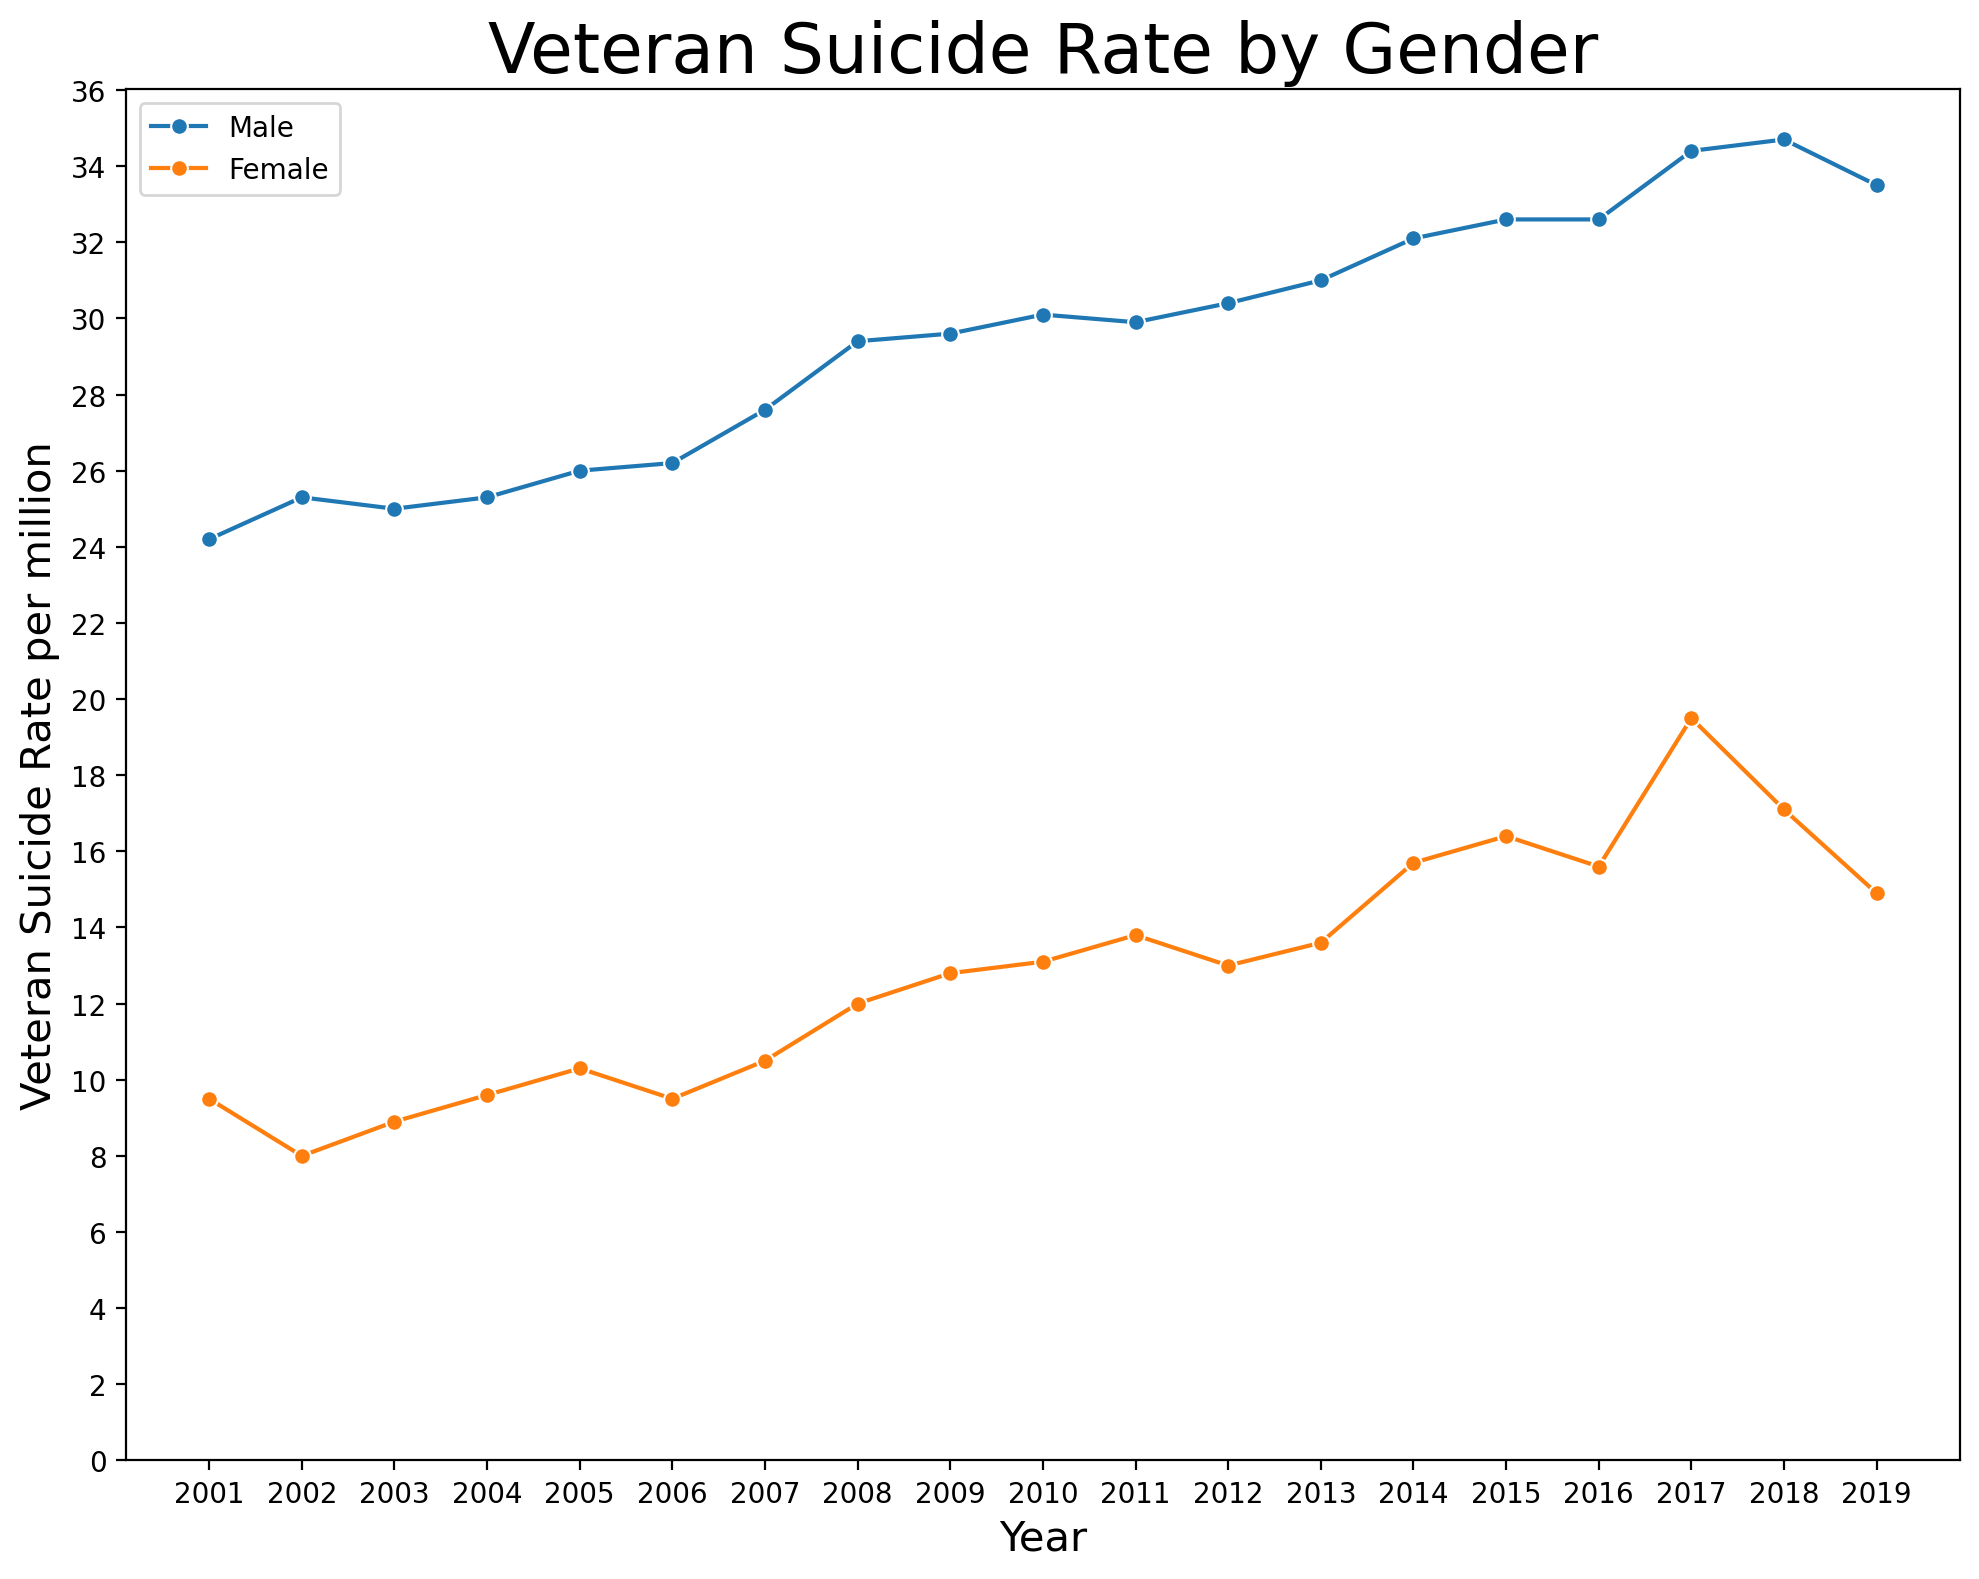

In [28]:
fig, ax = plt.subplots(figsize = (10,8), dpi=200)
sns.lineplot(x = df_sex['Year'], y =df_sex['Male Veteran Crude Rate per 100,000'], marker='o', label='Male')
sns.lineplot(x = df_sex['Year'], y =df_sex['Female Veteran Crude Rate per 100,000'], marker='o', label='Female')
ax.set_ylabel('Veteran Suicide Rate per million', fontsize = 15)
ax.set_xlabel('Year', fontsize = 15)
ax.set_title('Veteran Suicide Rate by Gender', fontsize = 25)
ax.set_xticks(df_sex['Year'])
ax.set_yticks(np.arange(0, 38, 2))
plt.yticks(fontsize = 10)
fig.tight_layout()

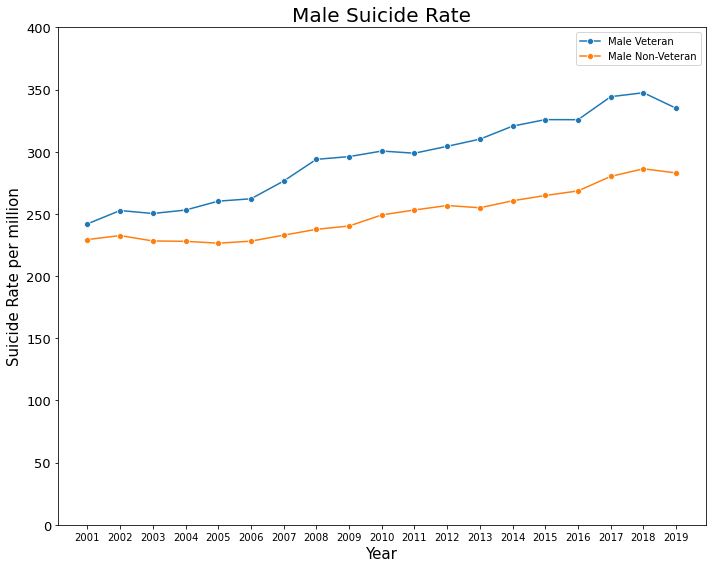

In [33]:
fig, ax = plt.subplots(figsize = (10,8))
sns.lineplot(x = df_sex['Year'], y =df_sex['Male Veteran Suicide Deaths per million'], marker='o', label='Male Veteran')
sns.lineplot(x = df_sex['Year'], y =df_sex['Male Non-Veteran Suicide Deaths per million'], marker='o', label='Male Non-Veteran')
ax.set_ylabel('Suicide Rate per million', fontsize = 15)
ax.set_xlabel('Year', fontsize = 15)
ax.set_title('Male Suicide Rate', fontsize = 20)
ax.set_xticks(df_sex['Year'])
plt.ylim((0,400))
plt.yticks(fontsize = 13)
fig.tight_layout()

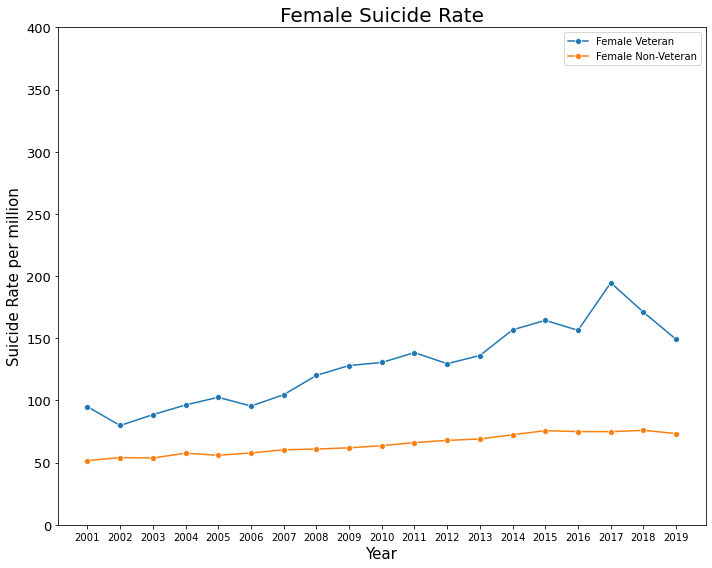

In [32]:
fig, ax = plt.subplots(figsize = (10,8))
sns.lineplot(x = df_sex['Year'], y =df_sex['Female Veteran Suicide Deaths per million'], marker='o', label='Female Veteran')
sns.lineplot(x = df_sex['Year'], y =df_sex['Female Non-Veteran Suicide Deaths per million'], marker='o', label='Female Non-Veteran')
ax.set_ylabel('Suicide Rate per million', fontsize = 15)
ax.set_xlabel('Year', fontsize = 15)
ax.set_title('Female Suicide Rate', fontsize = 20)
ax.set_xticks(df_sex['Year'])
plt.ylim((0,400))
plt.yticks(fontsize = 13)
fig.tight_layout()

#### Testing with median year

In [18]:
df_sex.head(10)

,Year,Male Veteran Suicide Deaths,Male Veteran Population Estimate,"Male Veteran Crude Rate per 100,000",Female Veteran Suicide Deaths,Female Veteran Population Estimate,"Female Veteran Crude Rate per 100,000",Male Non-Veteran Suicide Deaths,Male Non-Veteran Population Estimate,Female Non-Veteran Suicide Deaths,Female Non-Veteran Population Estimate,Male US Population Suicide Deaths,Male US Population Population Estimate,Female US Population Suicide Deaths,Female US Population Population Estimate,Male Veteran Suicide Deaths per million,Female Veteran Suicide Deaths per million,Male Non-Veteran Suicide Deaths per million,Female Non-Veteran Suicide Deaths per million,Male US Population Suicide Deaths per million,Female US Population Suicide Deaths per million,Male Veteran Population Estimate (million),Female Veteran Population Estimate (million),Male Non-Veteran Population Estimate (million),Female Non-Veteran Population Estimate (million)
0,2001,5835,24112000,24.2,154,1621000,9.5,18015,78543150,5576,108021630,23850,102655150,5730,109642630,241.995687,95.003085,229.364369,51.619291,232.331257,52.260695,24.112,1.621,78.543150,108.021630
1,2002,5995,23720000,25.3,134,1678000,8.0,18643,80150723,5899,109140013,24638,103870723,6033,110818013,252.740304,79.856973,232.599274,54.049838,237.198696,54.440608,23.720,1.678,80.150723,109.140013
2,2003,5830,23288000,25.0,151,1705000,8.9,18651,81706067,5927,110308108,24481,104994067,6078,112013108,250.343525,88.563050,228.269463,53.731318,233.165556,54.261507,23.288,1.705,81.706067,110.308108
3,2004,5822,23002000,25.3,169,1754000,9.6,18989,83297063,6419,111454500,24811,106299063,6588,113208500,253.108425,96.351197,227.967221,57.593009,233.407514,58.193510,23.002,1.754,83.297063,111.454500
4,2005,5923,22757000,26.0,189,1843000,10.3,19205,84799058,6293,112593872,25128,107556058,6482,114436872,260.271565,102.550190,226.476572,55.891141,233.627008,56.642583,22.757,1.843,84.799058,112.593872
5,2006,5845,22295000,26.2,174,1822000,9.5,19753,86596802,6580,113908396,25598,108891802,6754,115730396,262.166405,95.499451,228.103112,57.765716,235.077384,58.359776,22.295,1.822,86.596802,113.908396
6,2007,6046,21871000,27.6,186,1778000,10.5,20569,88309976,6953,115252826,26615,110180976,7139,117030826,276.439120,104.611924,232.918193,60.328239,241.557127,61.001022,21.871,1.778,88.309976,115.252826
7,2008,6346,21593000,29.4,209,1740000,12.0,21380,89980088,7110,116676276,27726,111573088,7319,118416276,293.891539,120.114943,237.608125,60.937838,248.500785,61.807382,21.593,1.740,89.980088,116.676276
8,2009,6278,21203000,29.6,228,1780000,12.8,22030,91680196,7303,117974166,28308,112883196,7531,119754166,296.090176,128.089888,240.291807,61.903383,250.772489,62.887165,21.203,1.780,91.680196,117.974166
9,2010,6302,20967000,30.1,233,1785000,13.1,23224,93198704,7589,119250296,29526,114165704,7822,121035296,300.567559,130.532213,249.188014,63.639255,258.624079,64.625777,20.967,1.785,93.198704,119.250296


In [19]:
shared_sample_freq = (6302 + 233) / 22752000
shared_sample_variance = 22752000 * (shared_sample_freq * (1 - shared_sample_freq)) / (20967000*1785000)

difference_in_proportions = stats.norm(0, np.sqrt(shared_sample_variance))

Text(0.5, 1.0, 'Distribution of Difference in Sample Frequencies Assuming $H_0$')

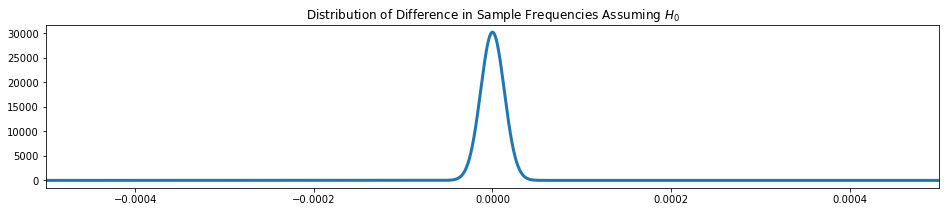

In [20]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-.0005, .0005, num=10000)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.set_xlim(-.0005, .0005)
ax.set_title("Distribution of Difference in Sample Frequencies Assuming $H_0$")

In [24]:
male_vet_sample_freq = 6302/20967000
female_vet_sample_freq = 233/1785000
difference_in_sample_proportions = male_vet_sample_freq - female_vet_sample_freq
print(difference_in_sample_proportions)

0.0001700353456592252


In [25]:
p_value = 1 - difference_in_proportions.cdf(difference_in_sample_proportions)
print(p_value)

0.0


Text(0.5, 1.0, 'p-value Reigon')

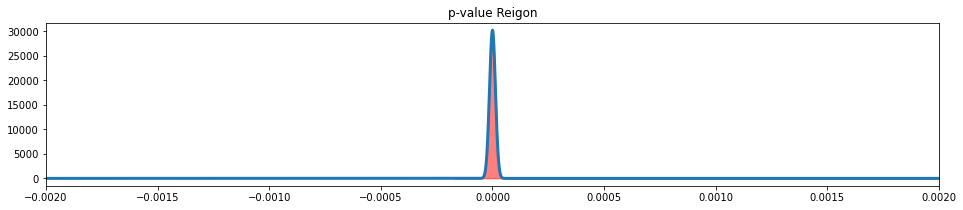

In [23]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-.002, .002, num=10000)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.fill_between(x, difference_in_proportions.pdf(x), where=(x >= difference_in_sample_proportions),
                color="red", alpha=0.5)
ax.set_xlim(-.002, .002)
ax.set_title("p-value Reigon")